In [2]:
# %%capture
# !pip install -U pandasql
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
import os
#import xlrd


# Clienti

In [3]:
dfClienti = pd.read_excel('RawDatasets/Clienti.xlsx')

dfClienti.to_csv('dfClienti.csv')

dfClienti.head()

,Nr,CodCondizioniPagam,Fatt. cumulative,Valuta
0,C00001,101,False,1
1,C00003,102,False,2
2,C00004,102,False,3
3,C00005,112,False,1
4,C00006,101,False,2


In [4]:
#1: Euro
indice1 = dfClienti.loc[dfClienti.Valuta == 1, :]

indice1.insert(loc=4, column='Valuta',
               value='Euro', allow_duplicates=True)

#2: Dollaro
indice2 = dfClienti.loc[dfClienti.Valuta == 2, :]

indice2.insert(loc=4, column='Valuta',
               value='Dollaro', allow_duplicates=True)


#3: Yen
indice3 = dfClienti.loc[dfClienti.Valuta == 3, :]

indice3.insert(loc=4, column='Valuta',
               value='Dollaro', allow_duplicates=True)

#Unione delle sottotabelle
union = pd.concat([indice1, indice2, indice3])

union.to_csv('dfClienti.csv')

union.head()

,Nr,CodCondizioniPagam,Fatt. cumulative,Valuta,Valuta
0,C00001,101,False,1,Euro
3,C00005,112,False,1,Euro
6,C00008,101,False,1,Euro
9,C00011,101,False,1,Euro
12,C00017,101,False,1,Euro


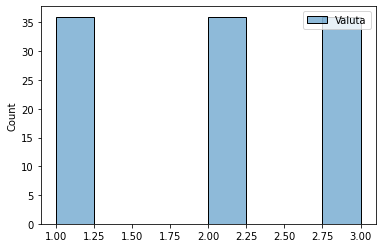

In [77]:
sns.histplot(union.Valuta)
plt.savefig('Valuta.jpeg')

# Consumi

In [5]:
dfConsumi = pd.read_excel('RawDatasets/Consumi.xlsx')

del dfConsumi["TipoMovimento"]
del dfConsumi["TipoOrigine"]

dfConsumi.to_csv('dfConsumi.csv')

dfConsumi.head()

,NrMovimento,Budget/cons,CodiceMP,NrArticolo,NrDocumento,QuantityMPImpiegata,ImportoCostoTOTALE
0,21684,BUDGET,ART0001929,ART0000788,ODP16-16812,1.0,126.01
1,21685,BUDGET,ART0001820,ART0000788,ODP16-16812,1.0,52.71
2,21686,BUDGET,ART0005137,ART0000788,ODP16-16812,1.0,0.00
3,21687,BUDGET,ART0005138,ART0000788,ODP16-16812,1.0,0.00
4,21688,BUDGET,ART0005139,ART0000788,ODP16-16812,1.0,0.32


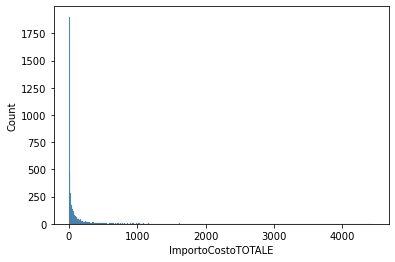

In [79]:
sns.histplot(dfConsumi.ImportoCostoTOTALE)
plt.savefig('ConsumiCostoTotale.jpeg')

# Costo orario risorse - budget

In [6]:
dfCostoOrario = pd.read_excel('RawDatasets/Costo orario risorse - budget.xlsx')

dfCostoOrario.to_csv('dfCostoOrario.csv')

dfCostoOrario.head()

,Risorsa,AreaProduzione,CostoOrario
0,RIS1,A10,51.0
1,RIS1,A11,51.0
2,RIS1,A20,68.0
3,RIS1,A30,68.0
4,RIS1,A32,51.0


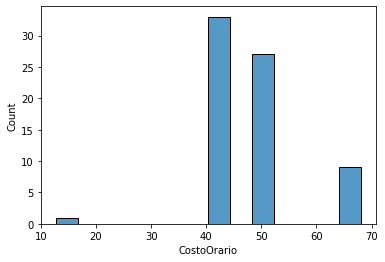

In [82]:
#Istogramma del costo orario
sns.histplot(dfCostoOrario.CostoOrario)
plt.savefig('CostoOrario.jpeg')

In [7]:
dfClienti = pd.read_excel('RawDatasets/Clienti.xlsx')

dfClienti.to_csv('dfClienti.csv')

dfClienti.head()


,Nr,CodCondizioniPagam,Fatt. cumulative,Valuta
0,C00001,101,False,1
1,C00003,102,False,2
2,C00004,102,False,3
3,C00005,112,False,1
4,C00006,101,False,2


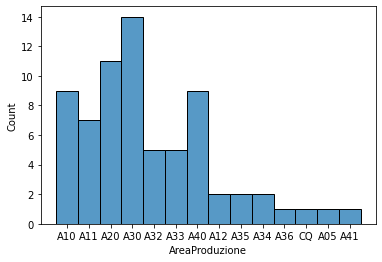

In [84]:
#Istogramma dell'area di produzione
sns.histplot(dfCostoOrario.AreaProduzione)
plt.savefig('CostoOrarioAreaProduzione.jpeg')


# Costo orario risorse - consuntivo

In [8]:
dfConsuntivo = pd.read_excel(
    'RawDatasets/Costo orario risorse - consuntivo.xlsx')

dfConsuntivo.to_csv('dfConsuntivo.csv')

dfConsuntivo.head()

,Risorsa,AreaProduzione,CostoOrario
0,RIS1,A10,60
1,RIS1,A11,60
2,RIS1,A20,80
3,RIS1,A30,80
4,RIS1,A32,60


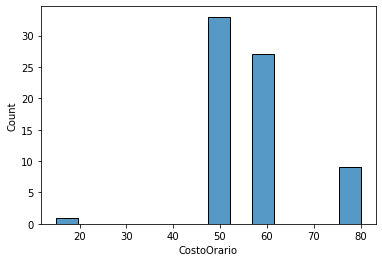

In [86]:
sns.histplot(dfConsuntivo.CostoOrario)
plt.savefig('ConsuntivoCostoOrario.jpeg')


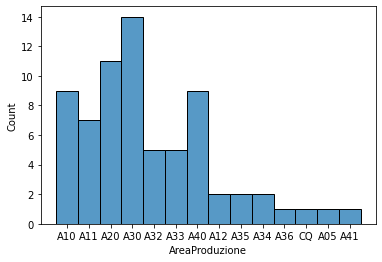

In [87]:
sns.histplot(dfConsuntivo.AreaProduzione)
plt.savefig('ConsuntivoAreaProduzione.jpeg')


# Impiego orario risorse

In [9]:
dfImpiegoRisorse = pd.read_excel('RawDatasets/Impiego orario risorse.xlsx')

dfImpiegoRisorse.to_csv('dfImpiegoRisorse.csv')

dfImpiegoRisorse.head()

,nrArticolo,budgetConsuntivo,NrOrdineDiProduzione,Descrizione,NrAreaProduzione,Risorsa,TempoRisorsa,QuantityOutput
0,ART0000788,BUDGET,ODP16-16812,Montaggio,A40,RIS4,0.25,1.0
1,ART0000756,BUDGET,ODP16-15232,Montaggio,A40,RIS4,1.00,2.0
2,ART0000772,BUDGET,ODP16-15712,Montaggio,A40,RIS4,1.25,1.0
3,ART0000762,BUDGET,ODP16-14704,Montaggio,A40,RIS4,3.00,10.0
4,ART0000762,BUDGET,ODP16-14704,Controllo qualità,CQ,RIS16,0.00,10.0


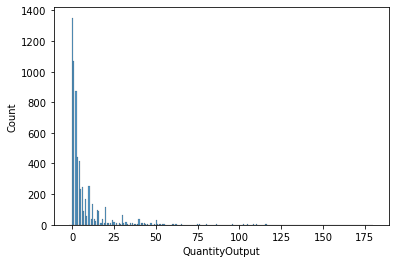

In [89]:
sns.histplot(dfImpiegoRisorse.QuantityOutput)
plt.savefig('ImpiegoRisorseOutput.jpeg')


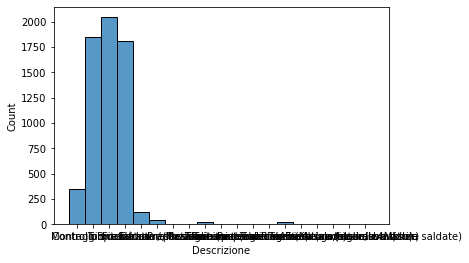

In [90]:
sns.histplot(dfImpiegoRisorse.Descrizione)
plt.savefig('ImpiegoRisorseDescrizione.jpeg')


<AxesSubplot:xlabel='TempoRisorsa', ylabel='Count'>

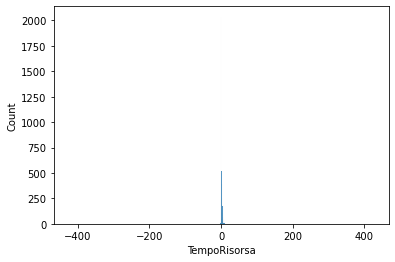

In [91]:
sns.histplot(dfImpiegoRisorse.TempoRisorsa)


# Tassi di cambio

In [10]:
dfCambio = pd.read_excel('RawDatasets/Tassi di cambio.xlsx')

dfCambio.to_csv('dfCambio.csv')

dfCambio.head()


,CodiceValuta,Anno,TassoDiCambioMedio
0,1,BUDGET,1.0000
1,2,BUDGET,1.0541
2,3,BUDGET,123.4000
3,1,CONSUNTIVO,1.0000
4,2,CONSUNTIVO,1.1993


<AxesSubplot:xlabel='TassoDiCambioMedio', ylabel='Count'>

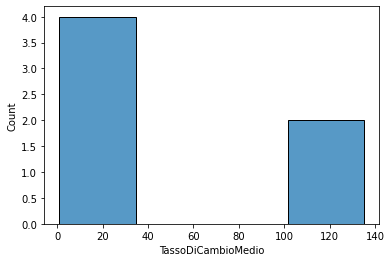

In [93]:
sns.histplot(dfCambio.TassoDiCambioMedio)

# Vendite

In [11]:
dfVendite = pd.read_excel('RawDatasets/Vendite.xlsx')

del dfVendite["TipoMovimento"]
del dfVendite["TipoOrigine"]

dfVendite.to_csv('dfVendite.csv')

dfVendite.head()


,NrMovimento,budget/cons,NrArticolo,NrOrigine,Quantity,ImportoVenditaInValutaLocaleTOTALEVENDITA
0,21621,BUDGET,ART0001433,C00140,4,18.80
1,21629,BUDGET,ART0001610,C00140,12,145.28
2,21631,BUDGET,ART0003269,C00140,24,933.99
3,21633,BUDGET,ART0002249,C00140,1,36.33
4,21634,BUDGET,ART0002370,C00140,1,65.72


<AxesSubplot:xlabel='ImportoVenditaInValutaLocaleTOTALEVENDITA', ylabel='Count'>

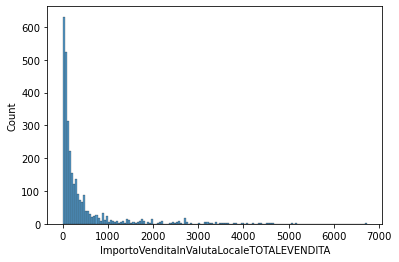

In [95]:
sns.histplot(dfVendite.ImportoVenditaInValutaLocaleTOTALEVENDITA)
